In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:/Users/sayan/OneDrive/Desktop/NETFLIX DATA ANALYSIS/netflix1.csv")
df.head()

,TV,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   TV            8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [6]:
# Count missing values in each column
df.isnull().sum()

TV              0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [7]:
# Check for duplicate rows
print("Duplicate Rows:", df.duplicated().sum())

# Drop duplicates if necessary
df = df.drop_duplicates()

Duplicate Rows: 0


In [8]:
# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [9]:
df.to_csv("cleaned_netflix.csv", index=False)

C:\Users\sayan\AppData\Local\Temp\ipykernel_22128\750732255.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=content_counts.index, y=content_counts.values, palette="coolwarm")


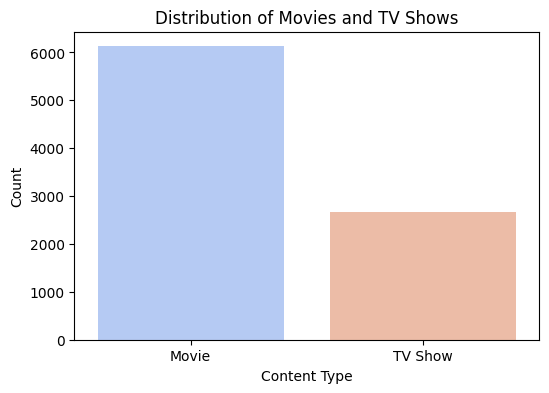

In [ ]:
# Count number of Movies and TV Shows
content_counts = df['type'].value_counts()

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x=content_counts.index, y=content_counts.values, palette="coolwarm")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.title("Distribution of Movies and TV Shows")
plt.show()

C:\Users\sayan\AppData\Local\Temp\ipykernel_22128\1518346165.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_countries.index, x=top_countries.values, palette="viridis")


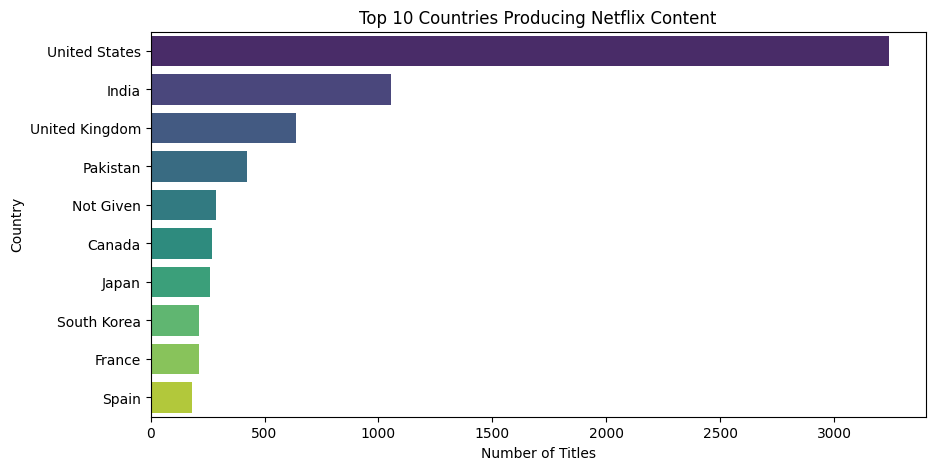

In [11]:
# Count number of titles per country
top_countries = df['country'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(y=top_countries.index, x=top_countries.values, palette="viridis")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.title("Top 10 Countries Producing Netflix Content")
plt.show()

C:\Users\sayan\AppData\Local\Temp\ipykernel_22128\2698159609.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['rating'], order=df['rating'].value_counts().index, palette="magma")


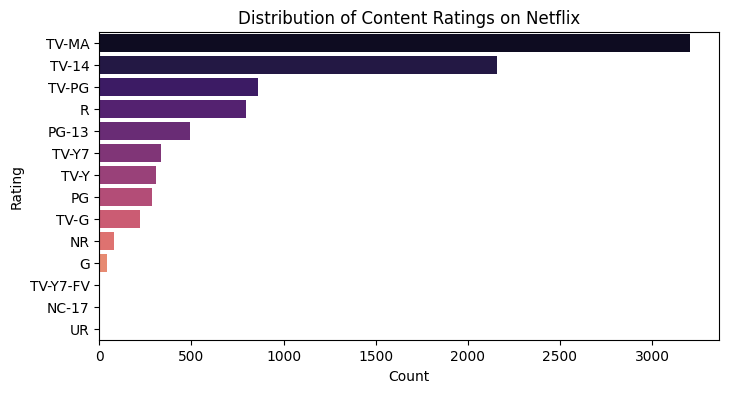

In [12]:
plt.figure(figsize=(8,4))
sns.countplot(y=df['rating'], order=df['rating'].value_counts().index, palette="magma")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.title("Distribution of Content Ratings on Netflix")
plt.show()

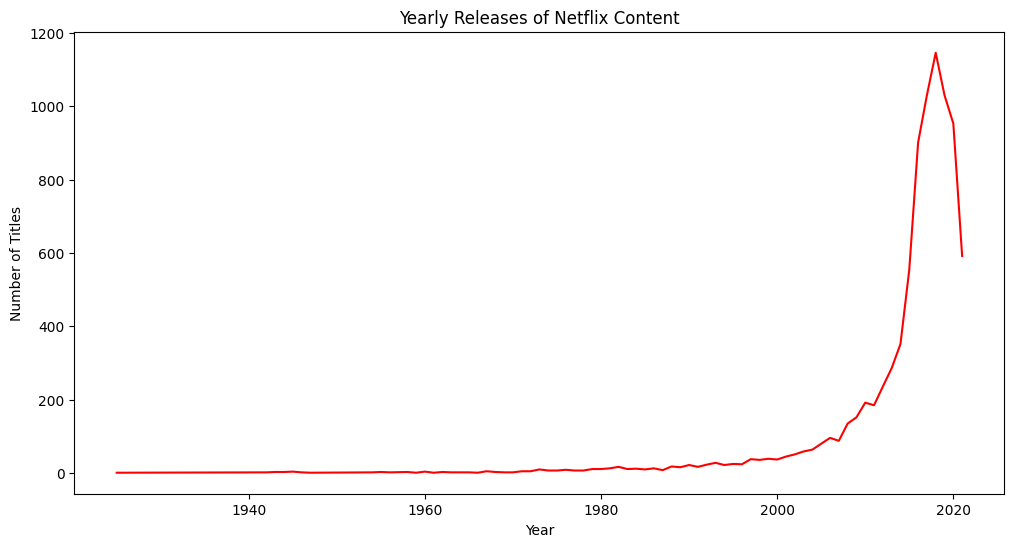

In [13]:
df['release_year'].value_counts().sort_index().plot(kind='line', figsize=(12,6), color="red")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.title("Yearly Releases of Netflix Content")
plt.show()

C:\Users\sayan\AppData\Local\Temp\ipykernel_7776\102866672.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette="viridis")


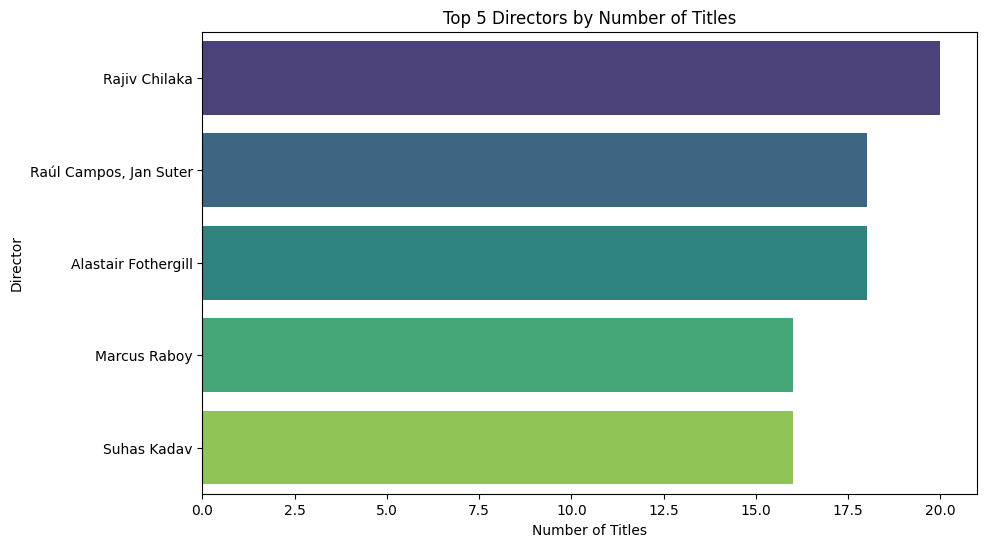

In [5]:
# Remove rows where the 'director' column contains 'Not Given'
df = df[df['director'] != 'Not Given']

# Get the top 5 directors based on the number of titles
top_directors = df['director'].value_counts().head(5)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette="viridis")

# Set labels and title
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.title("Top 5 Directors by Number of Titles")

# Show the plot
plt.show()

In [15]:
df.to_excel("cleaned_netflix.xlsx", index=False)